In [ ]:
# Description: This program uses Convolutional Neural Networks (CNN) 
#              to classify handwritten digits as numbers 0 - 9

In [ ]:
#import the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Load the data and split it into train and test sets
(X_train,y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# Take a look at the first image in the training data set as a numpy array. 
# This shows the image as a series of pixel values.
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
#Print the image label
y_train[0]

5

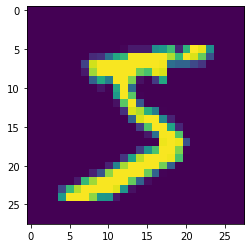

In [ ]:
# Show the image not as a series of pixel values, but as an actual image.
plt.imshow(X_train[0])

In [ ]:
#Reshape the data to fit the model
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
#One-Hot Encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Print the new label
print(y_train_one_hot[0])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#It’s time to build the model ! 
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
#Compile the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model 
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 173s 92ms/step - loss: 0.1996 - accuracy: 0.9550 - val_loss: 0.0697 - val_accuracy: 0.9800
Epoch 2/3
1875/1875 [==============================] - 174s 93ms/step - loss: 0.0634 - accuracy: 0.9809 - val_loss: 0.0695 - val_accuracy: 0.9797
Epoch 3/3
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.0838 - val_accuracy: 0.9796


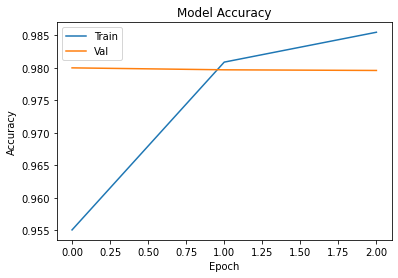

In [ ]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
#Show the probabilities of the first 4 images in the test set.
predictions = model.predict(X_test[:4])
predictions

1/1 [==============================] - 0s 93ms/step


array([[2.1104569e-11, 6.5961644e-18, 8.0027096e-12, 2.2614646e-09,
        1.8222211e-14, 4.2218127e-17, 6.2091821e-18, 1.0000000e+00,
        1.9576385e-09, 3.9359893e-09],
       [9.6668009e-06, 3.2896489e-07, 9.9998939e-01, 2.7959755e-13,
        2.4661483e-11, 1.0554895e-13, 6.4029769e-07, 2.4298956e-16,
        1.2441446e-10, 2.2835477e-15],
       [2.1228603e-08, 9.9994564e-01, 4.6766488e-09, 2.9599442e-10,
        5.4273187e-06, 2.3768898e-10, 4.8023153e-08, 3.8009775e-06,
        4.5096916e-05, 2.0441058e-09],
       [9.9999988e-01, 1.0259817e-15, 2.9356086e-09, 4.4185104e-13,
        4.2287701e-12, 1.9786884e-11, 6.4959522e-08, 6.8316581e-12,
        5.2612664e-11, 5.8597172e-10]], dtype=float32)

In [ ]:
#Print our predicitons as number labels for the first 4 images
import numpy as np
print( np.argmax(predictions, axis=1))
#Print the actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


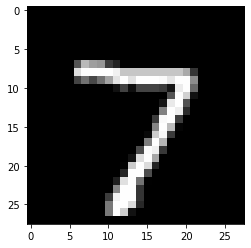

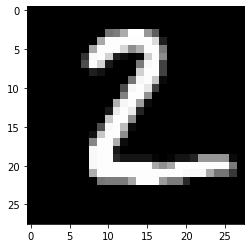

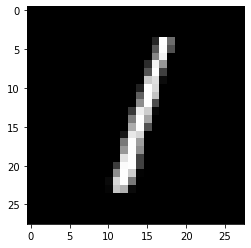

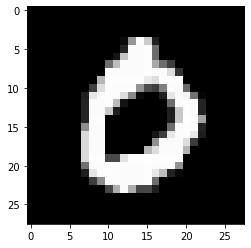

In [23]:
#Show the first 4 images as pictures 
for i in range(0,4):   
   image = X_test[i]   
   image = np.array(image, dtype='float')   
   pixels = image.reshape((28,28))  
   plt.imshow(pixels, cmap='gray')   
   plt.show()